# Lecture 25 - Backprop continued, ```tf.keras``` implementations & Best Practices for Training Artificial Neural Networks

# Error Backpropagation

* The learning procedure involves the presentation of a set of pairs of input and output patterns, $X=\{x_i\}_{i=1}^N$ and $Y=\{y_j\}_{j=1}^M$. The system uses the input vector to produce its own output vector and then compares this with the *desire output*, or *target output* $t=\{t_j\}_{j=1}^M$. If there is no difference, no learning takes place. Otherwise, the weights are changed to reduce the difference. This procedure is basically the perceptron learning algorithm.

* This procedure can be *automated* by the machine itself, without any outside help, if we provide some **feedback** to the machine on how it is doing. The feedback comes in the form of the definition of an *error criterion* or *objective function* that must be *minimized* (e.g. Mean Squared Error). For each training pattern we can define an error ($\epsilon_k$) between the desired response ($t_k$) and the actual output ($y_k$). Note that when the error is zero, the machine output is equal to the desired response. This learning mechanism is called **(error) backpropagation** (or **BP**).

* The backpropagation algorithm consists of two phases: 
     * **Forward phase:** computes the *functional signal*, feed-forward propagation of input pattern signals through the network.
    * **Backward phase:** computes the *error signal*, propagates the error backwards through the network starting at the output units (where the error is the difference between desired and predicted output values).

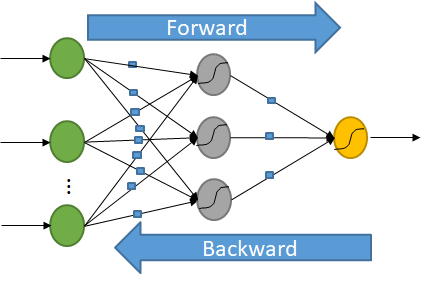

In [1]:
from IPython.display import Image
Image('figures/ForwardBackward.png',width=400)

* **Objective function/Error Criterion:** there are many possible definitions of the error, but commonly in neuro-computing one uses the error variance (or power):

\begin{align*}
J(w) = \frac{1}{2}\sum_{k=1}^N e_k^2 = \frac{1}{2} \sum_{k=1}^N (t_k-y_k)^2 = \frac{1}{2} \sum_{k=1}^N (t_k-w^Tx_k)^2
\end{align*}

* Now we need to define an **adaptive learning** algorithm. Backpropagation commonly uses the gradient descent as the adaptive learning algorithm.

* **Adaptive Learning Algorithm:** there are many learning algorithms, the most common is the method of Gradient/Steepest Descent.
    * Move in direction opposite to the gradient, $\nabla J(\mathbf{w})$, vector (**gradient descent**):

\begin{align*}
w^{(n+1)} &= w^{(n)} + \Delta w^{(n)}
\end{align*}

This is known as the **error correction rule**. We define: 

\begin{align*}
\Delta w^{(n)} &= w^{(n)} - w^{(n-1)}\\
\Delta w^{(n)} &= - \eta \nabla J(w^{(n)})
\end{align*}

where $\eta$ is the learning rate.

## Backpropagation of the Error for the Output Layer

There are many approaches to train a neural network. One of the most commonly used is the **Error Backpropagation Algorithm**. 

Let's first consider the output layer:
* Given a training set, $\left\{ (x_n, t_n)\right\}_{n = 1}^N$, we want to find the parameters of our network that minimizes the squared error: 

\begin{align*}
J(w) = \frac{1}{2} \sum_{l=1}^N (t_l - y_l)^2
\end{align*}

* In order to use gradient descent, we need to compute the analytic form of the gradient, $\frac{\partial J}{\partial w_{lj}}$.

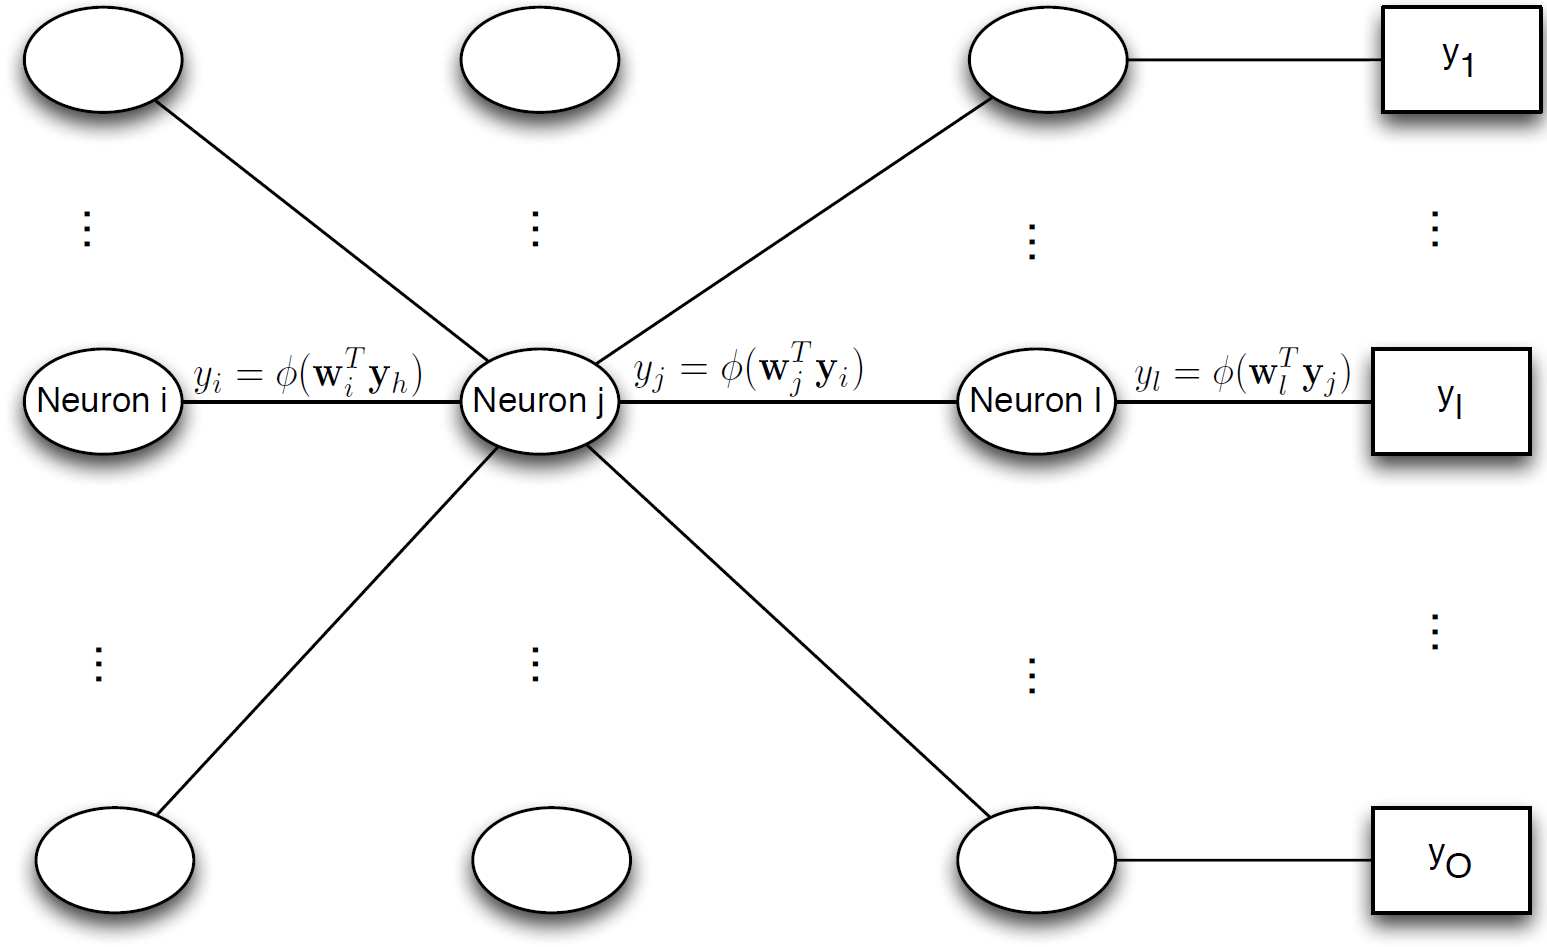

In [2]:
Image('figures/HiddenLayer.png',width=700)

<div class="alert alert-info">
    <b>Chain Rule</b>

Given a labelled training set, $\left\{ x_n, d_n\right\}_{n = 1}^N$, consider the objetive function 

\begin{align*}
J(w) = \frac{1}{2} \sum_{l=1}^N e_l^2
\end{align*}

where $w$ are the parameters to be estimated and $\forall l$: 

\begin{align*}
e_l &= t_l - y_l \\
y_l &= \phi(v_l)\text{, }\phi(\bullet)\text{ is an activation function}\\
v_l &= w^Tx_j\text{ (note that }x_j\in\mathbb{R}^{D+1}\text{)}  
\end{align*}

Using the Chain Rule, we find:

\begin{align*}
\frac{\partial J}{\partial w_{lj}} = \frac{\partial J}{\partial e_l} \frac{\partial e_l}{\partial y_l} \frac{\partial y_l}{\partial v_l} \frac{\partial v_l}{\partial w_{lj}}
\end{align*}

where
\begin{align*}
\frac{\partial J}{\partial e_l} = \frac{1}{2} 2 e_l = e_l = t_l - y_l
\end{align*}

\begin{align*}
\frac{\partial e_l}{\partial y_l} = -1
\end{align*}

\begin{align*}
\frac{\partial y_l}{\partial v_l} = \frac{\partial \phi(v_l)}{\partial v_l} = \phi'(v_l)
\end{align*}

\begin{align*}
\frac{\partial v_l}{\partial w_{lj}} = x_j
\end{align*}

Therefore

\begin{align*}
\frac{\partial J}{\partial w_{lj}} = e_l (-1) \phi'(v_l) x_j
\end{align*}

</div>

Now that we have the gradient, how do we use this to update the output layer weights in our MLP?

\begin{align*}
w_{lj}^{(t+1)} = w_{lj}^{(t)} - \eta \frac{\partial J}{\partial w_{lj}} = w_{lj}^{(t)} + \eta e_i\phi'(v_l) x_j
\end{align*}

* How will this update equation  (for the output layer) change if the network is a multilayer perceptron with hidden units?

* Can you write this in vector form to update all weights simultaneously?

* Next, the hidden layers...

---

## Popular Activation Functions and Their Derivatives

| Activation function | $\phi(x)$ | $\phi'(x) = \frac{d\phi(x)}{dx}$ |
| -- | -- | -- |
| Linear | $x$ | $1$ |
| Sigmoid/Logistic | $\frac{1}{1+e^{-x}}$ | $\phi(x)(1-\phi(x))$ |
| Tanh | $\frac{e^{x}-e^{-x}}{e^x + e^{-x}}$ | $1-\phi(x)^2$ |
| ReLU | $\begin{cases}0, & x \leq 0 \\ x, & x>0 \end{cases}$ | $\begin{cases}0, & x < 0 \\ 1, & x>0 \\ \text{undefined}, & x=0\end{cases}$ |
| Leaky ReLU | $\begin{cases}0.01 x, & x \leq 0 \\ x, & x>0 \end{cases}$ | $\begin{cases}0.01, & x < 0 \\ 1, & x>0 \\ \text{undefined}, & x=0\end{cases}$ |
| Softplus | $(1+e^x)$ | $\frac{1}{1+e^{-x}}$ |
| ELU | $\begin{cases}\alpha(e^x-1), & x \leq 0 \\ x, & x>0 \end{cases}$ |  $\begin{cases}\alpha e^x, & x < 0 \\ 1, & x>0 \\ 1, & x>0 \text{ and } \alpha=1  \end{cases}$ |
| SELU | $\lambda\begin{cases}\alpha(e^x-1), & x < 0 \\ x, & x\geq 0 \end{cases}$ | $\lambda\begin{cases}\alpha e^x, & x < 0 \\ 1, & x\geq 0 \end{cases}$ |

---

## Backpropagation of the Error for the Hidden Layers

* In a neural network, we can only define an error at the output layer! Therefore, we need to backward propagate the error obtain at the output layer, hence *backpropagation*.

Suppose we want to update $w_{ji}$ where $j$ is the hidden layer. (Let's follow the labeling in the figure below.)

The error objective function overall $N$ data points is 

\begin{align*}
J(w) = \frac{1}{2} \sum_{l=1}^N e_l^2 = \frac{1}{2} \sum_{l=1}^N \left(d_l - y_l\right)^2 = \frac{1}{2} \sum_{l=1}^N \left(d_l - \phi_l(v_l)\right)^2
\end{align*}

As we have seen earlier,

\begin{align*}
\frac{\partial J}{\partial w_{lj}} &= \frac{\partial J}{\partial e_l} \frac{\partial e_l}{\partial y_l} \frac{\partial y_l}{\partial v_l} \frac{\partial v_l}{\partial w_{lj}} \\
&= e_l (-1) \phi'(v_l) y_{jl}
\end{align*}

Let's define the *local gradient* $\delta_l$:

\begin{align*}
\delta_l &= -\frac{\partial J}{\partial v_l} \\
&= e_l \phi'(v_l)
\end{align*}

Similarly,

\begin{align*}
\delta_j &= -\frac{\partial J}{\partial v_j} \\
&= -\frac{\partial J}{\partial y_j} \frac{\partial y_j}{\partial v_j} \\
&= -\frac{\partial J}{\partial y_j} \phi'(v_j)
\end{align*}

Note that,

\begin{align*}
\frac{\partial J}{\partial y_j} &= \sum_l \frac{\partial J}{\partial e_l} \frac{\partial e_l}{\partial y_l} \frac{\partial y_l}{\partial v_l} \frac{\partial v_l}{\partial y_j} \\
&= \sum_l e_l (-1) \phi'(v_l) w_{lj} \\
\end{align*}

So,

\begin{align*}
\delta_j &= -\frac{\partial J}{\partial y_j} \phi'(v_j) \\
&= - \left[ \sum_l e_l (-1) \phi'(v_l) w_{lj} \right] \phi'(v_j) \\
&= \phi'(v_j)\sum_l \delta_l w_{lj}
\end{align*}

* We can write the gradient at a hidden neuron in terms of the local gradient and the connect neurons in the next layer:

\begin{align*}
\Delta w_{ij} = \eta \delta_j x_i
\end{align*}

And so,

\begin{align*}
w_{ij}^{t+1} \leftarrow w_{ij}^{t} + \Delta w_{ij}^{t}
\end{align*}

___

### Recommended Reading 

The paper that popularized backpropagation and brought interest again to the connectionism approach to solve AI.

* ["Learning representations by back-propagating errors"](https://www.nature.com/articles/323533a0) by David E. Rumelhart, Geoffrey E. Hinton, and Ronald J. Williams. Nature 323 (6088): 533–536, 8, October 1986.

---

# Challenges in Training ANNs

We have introduced standard MLPs, which are generally shallow networks, with just a few layers. What if you need to tackle a very complex problem, such as detecting hundreds of types of objects in high-resolution images? You may need to train a much deeper architecture, perhaps with 10 layers or much more, each containing hundreds of neurons, connected by hundreds of thousands of connections. This would not be an easy task.

1. **Vanishing gradient problem**. You would be faced with the tricky vanishing gradients problem (or the related exploding gradients problem) that affects deep neural networks and makes lower layers very hard to train. 

2. **Not enough training data**. You might not have enough training data for such a large network, or it might be too costly to label. 

3. **Training is too slow**. Training may be extremely slow. 

4. **Model has millions of parameters causing a severe risk of overfitting**. A model with millions of parameters would severely risk overfitting the training set, especially if there are not enough training instances, or they are too noisy.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, t_train_full), (X_test, t_test) = fashion_mnist.load_data()

X_train_full.shape, t_train_full.shape, X_test.shape, t_test.shape

In [ ]:
# Training and Validation sets
# First 5,000 samples as validation and the remaining ones as training samples
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
t_valid, t_train = t_train_full[:5000], t_train_full[5000:]

X_test = X_test / 255.0

In [ ]:
class_names = np.array(["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"])

In [ ]:
for i in range(10):
    labels = np.where(t_train==i)[0]
    idx = np.random.permutation(range(len(labels)))
    print(class_names[i])
    plt.figure(figsize=(15,3))
    for j in range(1,11):
        plt.subplot(1,10,j)
        plt.imshow(X_train[labels[j],:,:], cmap='gray')
        plt.axis('off')
    plt.pause(0.01);

## Creating the model using the Sequential API

Now let's build the neural network! Here is a classification MLP with two hidden layers:

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.output_shape

The model's ```summary()``` method displays all the model's layers, including each layer's name (which is automatically generated unless you set it when creating the layer), its output shape (None means the batch size can be anything), and its number of parameters. The summary ends with the total number of parameters, including trainable and non-trainable parameters. Here we only have trainable parameters:

In [ ]:
model.summary()

Note that Dense layers often have a lot of parameters. For example, the first hidden layer has $784 \times 300$ connection weights, plus 300 bias terms, which adds up to 235,500 parameters! This gives the model quite a lot of flexibility to fit the training data, but it also means that the model runs the **risk of overfitting**, especially when you do not have a lot of training data.

## Compiling the Model

After a model is created, you must call its ```compile()``` method to specify the loss function and the optimizer to use. Optionally, you can specify a list of extra metrics to compute during training and evaluation:

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

We use the ```sparse_categorical_crossentropy``` loss because we have sparse labels (i.e., for each instance, there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. 

If instead we had one target probability per class for each instance (such as one-hot vectors, e.g. $[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]$ to represent class 3), then we would need to use the ```categorical_crossentropy``` loss instead. 

* If you want to convert sparse labels (i.e., class indices) to one-hot vector labels, use the ```keras.utils.to_categorical()``` function.

If we were doing binary classification or multilabel binary classification, then we would use the ```sigmoid``` (i.e., logistic) activation function in the output layer instead of the ```softmax``` activation function, and we would use the ```binary_crossentropy``` loss.

In [ ]:
optimizer=keras.optimizers.SGD(learning_rate=0.01)
optimizer

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

## Training and evaluating the model

Now the model is ready to be trained. For this we simply need to call its ```fit()``` method:

In [ ]:
history = model.fit(X_train, t_train, epochs=10, 
                    validation_data=(X_valid, t_valid))

In [ ]:
history.history

In [ ]:
history.history.keys()

In [ ]:
history.params

## Learning Curves from the model's ```history```

In [ ]:
key_names = list(history.history.keys())
colors = ['-r','--b','-og','-.k']

plt.figure(figsize=(8,5))
for i in range(len(key_names)):
    plt.plot(history.history[key_names[i]], colors[i], label=key_names[i])
plt.legend(fontsize=15,ncol=2)
plt.title('Learning Curves', size=15);

In [ ]:
model.evaluate(X_test, t_test)

*Remember to resist the temptation to tweak the hyperparameters on the test set, or else your estimate of the generalization error will be too optimistic.*

## Using the model to make predictions

Next, we can use the model's ```predict()``` method to make predictions on new instances. Let's use test samples as an example:

As you can see, for each instance the model estimates one probability per class, from class 0 to class 9.

In [ ]:
plt.figure(figsize=(8,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(X_new[i],cmap='gray')
    plt.axis('off');

---

# 1. The Vanishing/Exploding Gradient Problem

* Backpropagation works by backpropagating the error gradients
* Gradients becomes smaller and smaller as it progresses down to lower layers, this is known as the **vanishing gradient problem**

**Solutions:**
1. Make variance of the output of each layer equal to the variances of its inputs
2. Utilize non-saturating activation functions
3. Batch normalization

## 1.1. Glorot and He Initialization

[In their paper](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf), Xavier Glorot and Yoshua Bengio propose a way to significantly alleviate the vanishing gradient problem. For the signal to flow properly, the authors argue that we need **the variance of the outputs of each layer to be equal to the variance of its inputs**, and we also need the gradients to have equal variance before and after flowing through a layer in the reverse direction.

* It is actually not possible to guarantee both unless the layer has an equal number of inputs and neurons (these numbers are called the fan-in and fan-out of the layer).

But they proposed a good compromise that has proven to work very well in practice: the connection weights of each layer must be initialized randomly as a Gaussian distribution with mean 0 and variance equal to 1 over the average fanning. This is known as the **Xavier Initialization**. 

In this table, you can see two other initializations that have also been shown to work empirically:

| Initialization | Activation Functions | $\sigma^2$ (Normal)|
| --              | --                             | --              | 
|  Glorot (2000)  |  None, Tanh, Sigmoid, Softmax  | $1/\text{fan}_{\text{avg}}$   |
|  He (2015)  |  ReLU and its variants  | $2/\text{fan}_{\text{in}}$   |
|  LeCunn (1999)  |  SELU  | $1/\text{fan}_{\text{in}}$   |

By default, Keras uses **Glorot initialization with a uniform distribution**. 

When creating a layer, you can change this to He initialization by setting ```kernel_initializer="he_uniform"``` or ```kernel_initializer="he_normal"``` like this:

In [ ]:
keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal')

If you want He initialization with a uniform distribution but based on $\text{fan}_{\text{avg}}$ than $\text{fan}_{\text{in}}$, you can use the ```VarianceScaling``` initializer like this:

In [ ]:
he_avg_init = keras.initializers.VarianceScaling(scale=2., 
                                                 mode='fan_avg', 
                                                 distribution='uniform')

keras.layers.Dense(10, activation='sigmoid', kernel_initializer=he_avg_init)

## 1.2. Non-Saturing Activation Functions

One of the insights in the 2010 paper by Glorot and Bengio was that the vanishing gradients problems were in part due to a poor choice of activation function.

* In deep architectures, sigmoid activation functions tend to saturate.

Other activation functions behave much better, in particular the **ReLU activation function**, mostly because it does not saturate for positive values and also because it is quite fast to compute.

* Unfortunately, the ReLU activation function is not perfect. It suffers from a problem known as the dying neurons: during training, some neurons effectively die, meaning they stop outputting anything other than 0. When this happens, it just keeps outputting 0s, and gradient descent does not affect it anymore since the gradient of the ReLU function is 0 when its input is negative.

To solve this problem, you may want to use a variant of the ReLU function, such as the **leaky ReLU**.

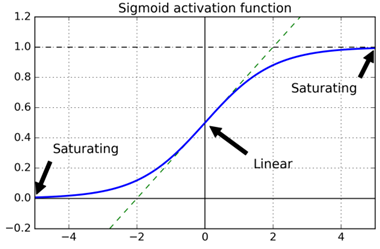

In [3]:
Image('figures/sigmoid.png',width=400)
# Source: "Hands-on machine learning with 
#scikit-learn and tensorflow" by Geron Aurelien

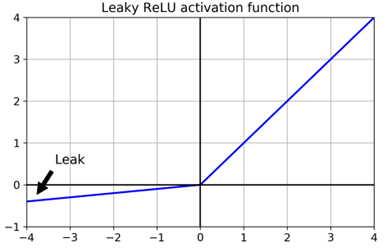

In [4]:
Image('figures/leaky_relu.png',width=400)
# Source: "Hands-on machine learning with 
#scikit-learn and tensorflow" by Geron Aurelien

* Current research has investigated different approaches to selecting the right slope for negative values. Namely, considering it a learnable parameter during training. This is known as the parametric leaky ReLU.

An alternative is to use the **Scaled Exponential Linear Unit, or SELU**. The output of each layer will tend to preserve mean 0 and standard deviation 1 during training, which solves the vanishing gradient problem.

The **Exponential Linear Unit (ELU)** is defined as:
\begin{align*}
\phi(x) = \begin{cases}x, & x> 0\\ \alpha(e^x-1), & x\leq 0\end{cases}
\end{align*}

typical values for $\alpha$ are $0.1\leq\alpha\leq 0.3$.

The **Scaled Exponential Linear Unit (SELU)** is defined as:
\begin{align*}
\phi(x) = \lambda\begin{cases}x, & x> 0\\ \alpha(e^x-1), & x\leq 0\end{cases}
\end{align*}

The [authors](https://arxiv.org/pdf/1706.02515.pdf) proposed to consider $\alpha\approx 1.6733$ and $\lambda \approx 1.0507$. When using this activation function in practice, one must use *Lecun Normal* for weight initialization, and if dropout wants to be applied, one should use *AlphaDropout*. More on this later in the code section.

In general we have the following relationship between the different activation function options:

> #### SELU > ELU > Leaky ReLU (and its variants) > ReLU > tanh > sigmoid

To use the leaky ReLU activation function, create a model just after the layer you want to apply it to: 

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(alpha=0.2),
    keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(10, activation='softmax')
])

For SELU activation, set ```activation="selu"``` and ```kernel_initializer="lecun_normal"``` when creating a layer: 

In [ ]:
layer = keras.layers.Dense(10, activation='selu', 
                           kernel_initializer='lecun_normal')

## 1.3. Batch Normalization

The other popular approach for alleviating the vanishing gradient problem is to use **batch normalization**, first published in 2015.

* The technique consists of adding an operation in the model just before or after the activation function of each hidden layer, simply **zero-centering and normalizing each input then scaling and shifting the result** using two new learnable parameter vectors per layer: one for scaling, the other for shifting.

In other words, this operation lets the model learn the optimal scale and mean of each of the layer's inputs. 

In many cases, if you add a batch normalization layer as the very first layer of your neural network, you do not need to standardize your training set: the batch normalization layer will do it for you. Well, approximately, since it only looks at one batch at a time, and it can also rescale and shift each input feature.

Just add a ```BatchNormalization``` layer before or after each hidden layer's activation function, and optionally add a batch normalization layer as well as the first layer in your model:

In [ ]:
model = keras.models.Sequential([ 
    keras.layers.Flatten(input_shape=[28, 28]), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dense(10, activation='softmax') 
])

In [ ]:
model.summary()

The authors of the Batch Normalization (BN) paper argued in favor of adding the BN layers before the activation functions, rather than after (as we just did). There is some debate about this, as which is preferable seems to depend on the task - you can experiment with this too to see which option works best on your dataset. 

To add the BN layers before the activation functions, you must remove the activation function from the hidden layers and add them as separate layers after the BN layers. 

Moreover, since a Batch Normalization layer includes one offset parameter per input, you can remove the bias term from the previous layer (just pass use_bias=False when creating it):

In [ ]:
model = keras.models.Sequential([ 
    keras.layers.Flatten(input_shape=[28, 28]), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dense(300, kernel_initializer='he_normal', use_bias=False), 
    keras.layers.BatchNormalization(), 
    keras.layers.Activation('elu'), 
    keras.layers.Dense(100, kernel_initializer='he_normal', use_bias=False), 
    keras.layers.BatchNormalization(), 
    keras.layers.Activation('elu'), 
    keras.layers.Dense(10, activation='softmax') 
])

In [ ]:
model.summary()

## 1.4. Gradient Clipping

Another popular technique to mitigate the exploding gradients problem is to clip the gradients during backpropagation so that they never exceed some threshold. This is called **Gradient Clipping**. 

This technique is most often used in recurrent neural networks (RNNs), as Batch Normalization is tricky to use in RNNs. For other types of networks, BN is usually sufficient. In ```Keras```, implementing Gradient Clipping is just a matter of setting the ```clipvalue``` or ```clipnorm``` argument when creating an optimizer, like this:

In [ ]:
optimizer = keras.optimizers.SGD(clipvalue=1.0) 

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizer)

This optimizer will clip every component of the gradient vector to a value between $-1.0$ and $1.0$.

---

# 2. Transfer Learning

It is generally not a good idea to train a very large deep neural network architecture from scratch. Specially if you have limited computational resources and/or a small training dataset.

Instead, you should always try to find an **existing neural network that accomplishes a similar task** to the one you are trying to tackle, then just **reuse the lower layers of this network**: this is called **transfer learning**. It will not only speed up training considerably but will also require much less training data. 

* For example, suppose that you have access to a Deep Neural Network (DNN) that was trained to classify pictures into 100 different categories, including animals, plants, vehicles, and everyday objects. You now want to train a DNN to classify specific types of vehicles. These tasks are very similar, even partly overlapping, so you should try to reuse parts of the first network.

The **output layer of the original model should usually be replaced since it is most likely not useful at all for the new task**, and it may not even have the right number of outputs for the new task. 

Similarly, the upper hidden layers of the original model are less likely to be as useful as the lower layers, since the high-level features that are most useful for the new task may differ significantly from the ones that were most useful for the original task. Try freezing all the reused layers first, then train your model and see how it performs. Then try unfreezing one or two of the top hidden layers to let backpropagation tweak them and see if performance improves. 

* The more training data you have, the more layers you can unfreeze. 

It is also useful to reduce the learning rate when you unfreeze reused layers: this will avoid wrecking their fine-tuned weights.

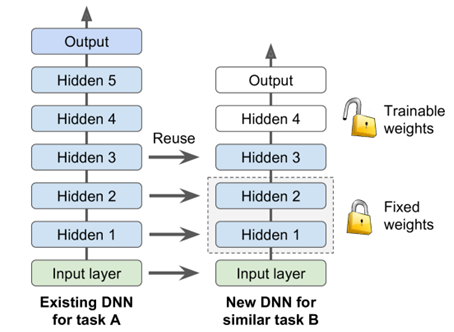

In [5]:
Image('figures/transfer_learning.png',width=400)
# Source: "Hands-on machine learning with scikit-learn and tensorflow" by Geron Aurelien

---

# 3. Faster Optimizers

## 3.1. Gradient Descent with Momentum

Momentum optimization was first **introduced in 1964**. Recall that Gradient Descent simply updates the weights theta by directly subtracting the gradient of the cost function multiplied by the learning rate:

$$\theta^{(t+1)} \leftarrow \theta^{(t)} - \eta\nabla J(\theta^{(t)})$$

Momentum optimization cares a great deal about what previous gradients were. At each iteration, it subtracts the local gradient from the momentum vector $m$ (multiplied by the learning rate), and it updates the weights by simply adding this momentum vector. In other words, the gradient is used for acceleration, not for speed. 

$$m^{(t+1)}\leftarrow \beta m^{(t)} - \eta \nabla J(\theta^{(t)})$$

$$\theta^{(t+1)} \leftarrow \theta^{(t)} + m^{(t+1)}$$

To simulate some sort of friction mechanism and prevent the momentum from growing too large, the algorithm introduces a new hyperparameter $\beta$, simply called the **momentum**, which must be set between 0 (high friction) and 1 (no friction). A **typical momentum value is 0.9**.

* Momentum optimization will roll down the valley faster and faster until it reaches the bottom (the optimum). In deep neural networks that don't use Batch Normalization, the upper layers will often end up having inputs with very different scales, so using Momentum optimization helps a lot. It can also help roll past local optima.

Implementing momentum optimization in ```Keras``` just use the optimizer ```SGD``` and set its momentum hyperparameter:

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

One small variant to Momentum optimization, called **Nesterov Accelerated Gradient or NAG**, proposed by Nesterov in 1983, is almost always faster than vanilla Momentum optimization. NAG measures the gradient of the cost function not at the local position but slightly ahead in the direction of the momentum, as seen in this picture. Making the convergence even faster than standard momentum.

$$m^{(t)} \leftarrow \theta^{(t)} + \mu (\theta^{(t)} - \theta^{(t-1)})$$

$$\theta^{(t+1)} \leftarrow \beta m^{(t)} - \eta \nabla J(m^{(t)})$$

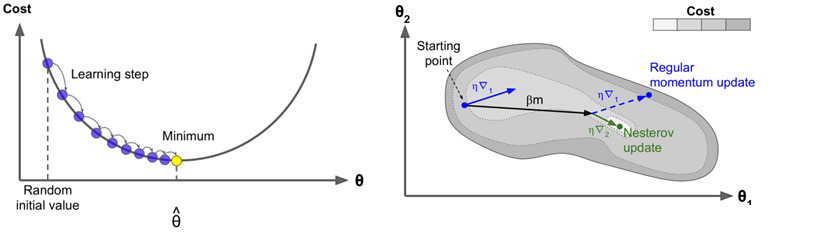

In [6]:
Image('figures/momentum.png',width=900)
# Source: "Hands-on machine learning with scikit-learn and tensorflow" by Geron Aurelien

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

## 3.2. Gradient Descent with Adaptive Learning Rate

In addition to being able to speed up Gradient Descent, we can also **update the learning rate** to perform larger or smaller updates depending on their importance.

$$\Delta w_{ij}^{(t)} = - \eta^{(t)} \nabla J(w_{ij}^{(t)})$$

* **AdaGrad ([Adaptive Gradient algorithm, 2011](https://jmlr.org/papers/volume12/duchi11a/duchi11a.pdf))**: It simply allows the learning rate to decrease based on the parameters of the network. So it makes big updates for infrequent parameters, and small updates for frequent parameters. For this reason, it is well-suited for dealing with sparse data. Its main weakness is that its learning rate is always decreasing and decaying.

* **RMSProp ([Root Mean Squared Progagation algorithm, 2012](http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf)):** RMSProp is also a method in which the learning rate is adapted for each of the parameters in the network. The idea is to divide the learning rate for a parameter by a running average of the magnitudes of recent gradients for that weight.

* **Adam ([Adaptive Moment Estimation, 2015](https://arxiv.org/abs/1412.6980)):** Adam combines RMSProp and momentum learning. It is by far the most common method used today. Adam also computes adaptive learning rates for each parameter of the network. In this optimization algorithm, running averages of both the gradients and the second moments of the gradients are used.

**Adam**, or **Adaptive Moment Estimation**, was introduced in 2015. Adam is currently the standard optimization learning algorithm for training deep neural networks as it combines the ideas of **momentum optimization and adaptive learning rate**.

* Just like Momentum optimization it keeps track of an exponentially decaying average of past gradients, and it keeps track of an exponentially decaying average of past squared gradients.

Since Adam is an adaptive learning rate algorithm, it requires less tuning of the learning rate hyperparameter. You can often use the default value of eta equal to $\eta=0.001$, making Adam even easier to use than Gradient Descent.

**Nesterov Adam or Nadam** optimization, [introduced in 2016](https://openreview.net/pdf/OM0jvwB8jIp57ZJjtNEZ.pdf), is simply Adam optimization plus the Nesterov trick, so it will often converge slightly faster than Adam.

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [ ]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

## 3.3. Learning Rate Scheduler

One approach is to start with a large learning rate and divide it by 3 until the training algorithm stops diverging. You will not be too far from the optimal learning rate, which will learn quickly and converge to good solution.

However, you can do better than a constant learning rate: if you start with a high learning rate and then reduce it once it stops making fast progress, you can reach a good solution faster than with the optimal constant learning rate. There are many different strategies to reduce the learning rate during training. These strategies are called learning schedules. Some examples include:
1. Power scheduling, where you set the learning rate to a function of the iteration number $t$,

\begin{align*}
\eta(t) = \eta_0 / (1+t/s)^c
\end{align*}

where $c$ is typically set to $c=1$, $t$ is the iteration number and the steps $s$ are hyperparameters.

2. exponential scheduling, and
3. piecewise constant scheduling.

Implementing power scheduling with ```Keras```, set the ```decay``` hyperparameter when creating an optimizer:

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

The ```decay``` is the inverse of $s$ (the number of steps it takes to divide the learning rate) and the value for $c$ is set to default $c=1$.

---

# 4. Avoid Overfitting Through Regularization

## 4.1. L1 and L2 Regularization

Deep neural networks typically have tens of thousands of parameters, sometimes even millions. With so many parameters, the network has an incredible amount of freedom and can fit a huge variety of complex datasets. But this great flexibility also means that it is prone to overfitting the training set. 

* Regularization constraints model parameters from becoming too large

**Ridge regularizer** or **L2-Norm** adds the term $\lambda\sum_{i=1}^M w_i^2$ to the cost function during training, where $\lambda$ controls tradeoff between minimizing error term and penalty term in cost function.

**Lasso regularizer** or **L1-Norm** adds the term $\lambda\sum_{i=1}^M |w_i|$. The Lasso regularizer promotes **sparsity** of the weight vector.

**Elastic Net** adds the term $\beta\lambda\sum_{i=1}^M |w_i| + \frac{1-\beta}{2}\lambda\sum_{i=1}^M w_i^2$.

In [ ]:
layer = keras.layers.Dense(100, 
                           activation='elu',
                           kernel_initializer='he_normal', 
                           kernel_regularizer=keras.regularizers.l2(0.01))

In [ ]:
layer = keras.layers.Dense(100, 
                           activation='elu',
                           kernel_initializer='he_normal', 
                           kernel_regularizer=keras.regularizers.l1(0.01))

In [ ]:
layer = keras.layers.Dense(100, 
                           activation='elu',
                           kernel_initializer='he_normal', 
                           kernel_regularizer=keras.regularizers.l1_l2(0.01))

## 4.2. Dropout

There are several strategies for network pruning which include:
* **Network Growing**: Start with a small MLP and add to it when unable to meet design specifications

* **Network Pruning**: Start with a large MLP and prune it by eliminating weights (driving them to zero)

* **Complexity Regularization**: Need an appropriate trade-off between reliability of training data and goodness of the model/NN architecture.

Dropout is one of the most popular regularization techniques for deep neural net works. It was proposed by Geoffrey Hinton in 2012. 

It is a fairly simple algorithm: at every training step, every neuron (including the input neurons, but always excluding the output neurons) has a probability p of being temporarily "dropped out," meaning it will be entirely ignored during this training step, but it may be active during the next step. The hyperparameter p is called the dropout rate, and it is typically set to 50%. 

After training, neurons don't get dropped anymore. That's it!

Neurons trained with dropout cannot co-adapt with their neighboring neurons; they have to be as useful as possible on their own. They also cannot rely excessively on just a few input neurons; they must pay attention to each of their input neurons. They end up being less sensitive to slight changes in the inputs. In the end you get a more robust network that generalizes better.

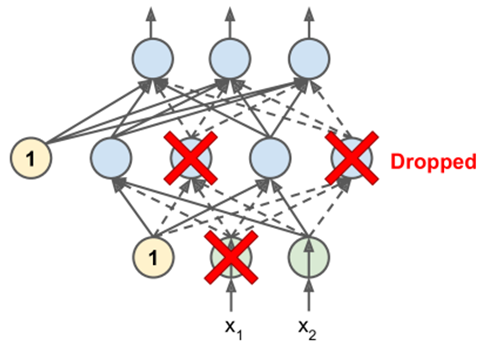

In [7]:
Image('figures/dropout.png',width=500)
# Source: "Hands-on machine learning with scikit-learn and tensorflow" by Geron Aurelien

In [ ]:
model = keras.models.Sequential([ 
    keras.layers.Flatten(input_shape=[28, 28]), 
    keras.layers.Dropout(rate=0.2), 
    keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'), 
    keras.layers.Dropout(rate=0.2), 
    keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'), 
    keras.layers.Dropout(rate=0.2), 
    keras.layers.Dense(10, activation='softmax') 
])

* If you observe that the model is overfitting, you can increase the dropout rate. 

* Conversely, you should try decreasing the dropout rate if the model underfits the training set. 

* It can also help to increase the dropout rate for large layers, and reduce it for small ones. 

* Moreover, many state-of-the-art architectures only use dropout after the last hidden layer, so you may want to try this if full dropout is too strong.

## 4.3. Early Stopping Criteria

A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called early stopping. As you can see in this figure, as the epochs go by, the algorithm learns and its prediction error (RMSE) on the training set naturally goes down, and so does its prediction error on the validation set. However, after a while the validation error stops decreasing and starts to go back up. This indicates that the model has started to overfit the training data. 

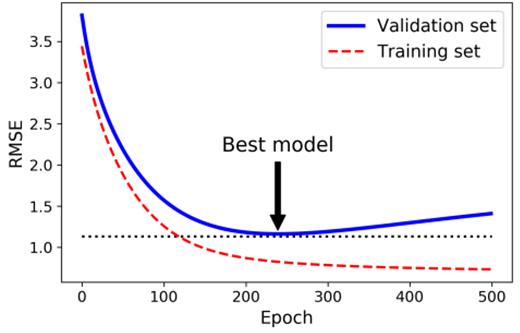

In [8]:
Image('figures/early_stopping.png',width=400)
# Source: "Hands-on machine learning with scikit-learn and tensorflow" by Geron Aurelien

This approach may result in a premature termination of learning.

an alternative is to consider the backpropagation algorithm to have converged when the Euclidean norm of the gradient vector reaches a sufficiently small threshold. However, learning may take a long time and it requires computation the norm of the gradient vector.

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='loss', 
                                         patience=3, 
                                         restore_best_weights=True)
# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy')

history = model.fit(X_train, t_train, epochs=10, 
                    validation_data=(X_valid, t_valid),
                    callbacks=[callback])

___

# 5. Online/Stochastic, Batch and Mini-Batch Learning

The number of samples used to perform a single training iteration (forward pass + backward pass) will impact the results.

* **Online Learning** (or stochastic/sequential learning): uses one sample to update the parameters of the network.
* **Batch Learning:** uses the entire training set to update the parameters of the network.

Another way to successfully train a deep neural network is to use **mini-bath learning**. 

* As a contrast, batch learning uses the entire training data to make changes on the model parameters by using the average gradient value. The **convergence of batch learning is smooth**, as you can see in the figure below, **but it is very slow**.

* In Stochastic or **Online learning**, we use a single training instance at a time to compute the gradient and use gradient descent to make changes on the model's parameters. The **convergence for online learning is random**, by nature, so it will be **erratic** as it becomes sensitive to small differences between training instances.

**Mini-batch learning is a good compromise between the two other learning strategies**. At each step, instead of computing the gradients based on the full training set (as in Batch) or based on just one instance (as in Stochastic), Minibatch computes the gradients on small random sets of instances called minibatches. The main advantage of Mini-batch over Stochastic is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

Common mini-batch sizes are 32, 64 and 128.

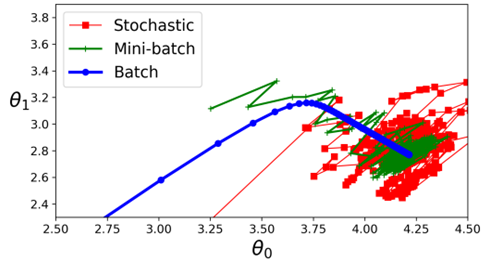

In [9]:
Image('figures/mini-batch.png',width=400)
# Source: "Hands-on machine learning with scikit-learn and tensorflow" by Geron Aurelien

In [ ]:
history = model.fit(X_train, t_train, epochs=10, batch_size=1,
                    validation_data=(X_valid, t_valid))

___

# 6. Emsemble Learning: Boosting

Boosting is an ensemble learning method.

If we take a collection of very poor (weak in the jargon) learners, each performing only just better than chance, then by putting them together it is possible to make an ensemble learner that can perform arbitrarily well. So we just need lots of low-quality learners, and a way to put them together usefully, and we can make a learner that will do very well.

The principal algorithm of boosting is named **AdaBoost** (Adaptive Boosting). Essentially, it give weights to each data point according to how difficult previous learners have found to get it correct. These weights are given to the classifier as part of the input when it is trained. The predictions from all learners are then combined through a weighted majority vote (or sum) to produce the final prediction.

Example: random forests.

___

# 7. Emsemble Learning: Bagging

Bagging (bootstrap aggregating) is an emsemble learning method. Bagging is a technique for reducing generalization error by combining several models. The idea is to train several different models separately, then have all the models vote on the output for test examples. This is an example of a general strategy in machine learning called model averaging. The reason that model averaging works is that different models will usually not make all the same errors on the test set.

Bagging methods work best with strong and complex models, in contrast with boosting methods which usually work best with weak models.

___

# 8. Determining Whether to Gather More Data

After the first end-to-end system is established, it is time to measure the performance of the algorithm and determine how to improve it. It is often much better to gather more data than to improve the learning algorithm (or first model of choice).

How does one decide whether to gather more data?

1. Determine whether the performance on the training set is acceptable. If performance on the training set is poor, the learning algorithm is not using the training data that is already available, so there is no reason to gather more data. 
    * Instead, try adding complexity to the model by adding more layers or adding more hidden units to each layer. 
    * Also, try improving the optimization algorithm, for example by tuning the learning rate. 
    * If more complex models and carefully tuned optimization algorithms do not work well, then the problem might be the *quality* of the training data. The data may be too noisy or may not include the right inputs needed to predict the desired outputs. This suggests starting over, collecting cleaner data, or collecting a richer set of features.

2. If the performance on the training set is acceptable, then measure the performance on a test set. If the performance on the test set is also acceptable, then there is nothing left to be done. If test set performance is much worse than training set performance, then gathering more data is one of the most effective solutions. In some applications, gathering more data is simply infeasible or impossible. 
    * A simple alternative to gathering more data is to reduce the size of the model or improve regularization, by adjusting hyperparameters such as weight decay coefficients,or by adding regularization strategies such as dropout. 
    * If you find that the gap between train and test performance is still unacceptable even after tuning the regularization hyperparameters, then gathering more data is advisable.
    
3. When deciding whether to gather more data, it is also necessary to decide how much to gather. It is helpful to plot curves showing the relationship between training set size and generalization error. 
    * You can experiment with training set sizes on a logarithmic scale, for example, doubling the number of examples between consecutive experiments.

___

# Summary

We covered a wide range of techniques for training deep neural networks. The configuration provided in this table will work fine in most cases, without requiring much hyperparameter tuning.

| Hyperparameter | Default Value|
|         --     | --           |
| Kernel Initializer | LeCunn Initialization|
| Activation Function | SELU|
| Regularization    | Early stopping | 
|  Optimizer    | Adam     |
| Learning rate schedule | Performance scheduling | 
|Learning configuration | Mini-batch  |
|  Dropout | 50% |

___

# Decision Maps in MLPs

[A Neural Network Playground](https://playground.tensorflow.org/#activation=tanh&regularization=L2&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=10&networkShape=2&seed=0.66302&showTestData=false&discretize=false&percTrainData=80&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) is a great tool to provide visual interpretation of MLPs performance. You can choose and interpret the effect of the use of different features, architecture size, learning rate, among others.

---